# Journal for Results included in PV ICE Paper 1

In [1]:
m1 = False
m2 = False
m3 = True


In [2]:
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'ElectricFutures')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)



Your simulation will be stored in C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\ElectricFutures


In [3]:
PV_ICE.__version__


'v0.2.0+66.gd0a175b.dirty'

In [4]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)


In [5]:

MATERIALS = ['glass','silver','silicon', 'copper','aluminium_frames', 'backsheet', 'encapsulant']
MATERIAL = MATERIALS[0]

MODULEBASELINE = r'..\..\baselines\ElectrificationFutures_2021\baseline_modules_US_NREL_Electrification_Futures_2021_basecase.csv'
MODULEBASELINE_High = r'..\..\baselines\ElectrificationFutures_2021\baseline_modules_US_NREL_Electrification_Futures_2021_LowREHighElec.csv'


In [6]:
r1 = PV_ICE.Simulation(name='PV_ICE', path=testfolder)
r1.createScenario(name='base', file=MODULEBASELINE)
r1.createScenario(name='high', file=MODULEBASELINE_High)

r1.scenario['base'].addMaterials(MATERIALS, r'..\..\baselines')
r1.scenario['high'].addMaterials(MATERIALS, r'..\..\baselines')


path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\ElectricFutures


In [7]:
r2 = PV_ICE.Simulation(name='bifacialTrend', path=testfolder)
r2.createScenario(name='base', file=MODULEBASELINE)
r2.scenario['base'].addMaterials(MATERIALS, r'..\..\baselines')

r2.createScenario(name='high', file=MODULEBASELINE_High)
r2.scenario['high'].addMaterials(MATERIALS, r'..\..\baselines')


# Rewriting with bifacial ones
MATERIALBASELINE = r'..\..\baselines\PVSC_2021\baseline_material_glass_bifacialTrend.csv'
r2.scenario['base'].addMaterial('glass', file=MATERIALBASELINE)
MATERIALBASELINE = r'..\..\baselines\PVSC_2021\baseline_material_aluminium_frames_bifacialTrend.csv'
r2.scenario['base'].addMaterial('aluminium_frames', file=MATERIALBASELINE)

MATERIALBASELINE = r'..\..\baselines\PVSC_2021\baseline_material_glass_bifacialTrend.csv'
r2.scenario['high'].addMaterial('glass', file=MATERIALBASELINE)
MATERIALBASELINE = r'..\..\baselines\PVSC_2021\baseline_material_aluminium_frames_bifacialTrend.csv'
r2.scenario['high'].addMaterial('aluminium_frames', file=MATERIALBASELINE)



path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\ElectricFutures


In [8]:
r3 = PV_ICE.Simulation(name='Irena_EL', path=testfolder)
r3.createScenario(name='base', file=MODULEBASELINE)
r3.createScenario(name='high', file=MODULEBASELINE_High)
r3.scenario['base'].addMaterials(MATERIALS, r'..\..\baselines')
r3.scenario['high'].addMaterials(MATERIALS, r'..\..\baselines')

r3.scenMod_IRENIFY(scenarios=['base', 'high'], ELorRL = 'EL' )

path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\ElectricFutures
Using Irena Early Loss Assumptions


In [9]:
r4 = PV_ICE.Simulation(name='Irena_RL', path=testfolder)
r4.createScenario(name='base', file=MODULEBASELINE)
r4.createScenario(name='high', file=MODULEBASELINE_High)
r4.scenario['base'].addMaterials(MATERIALS, r'..\..\baselines')
r4.scenario['high'].addMaterials(MATERIALS, r'..\..\baselines')
r4.scenMod_IRENIFY(scenarios=['base', 'high'], ELorRL = 'RL' )

path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\ElectricFutures
Using Irena Regular Loss Assumptions


In [10]:
r1.calculateMassFlow(m1=m1, m2=m2, m3=m3)
r2.calculateMassFlow(m1=m1, m2=m2, m3=m3)
r3.calculateMassFlow(m1=m1, m2=m2, m3=m3)
r4.calculateMassFlow(m1=m1, m2=m2, m3=m3)

Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  backsheet
==> Working on Material :  encapsulant
Working on Scenario:  high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  backsheet
==> Working on Material :  encapsulant
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
==> Working on Material :  backs

# Compile Results

In [11]:
objects = [r1, r2, r3, r4]
scenarios = ['base', 'high']


In [12]:
pvice_Usyearly1, pvice_Uscum1 = r1.aggregateResults()
pvice_Usyearly2, pvice_Uscum2 = r2.aggregateResults()
pvice_Usyearly3, pvice_Uscum3 = r3.aggregateResults()
pvice_Usyearly4, pvice_Uscum4 = r4.aggregateResults()
UScum = pd.concat([pvice_Uscum1, pvice_Uscum2, pvice_Uscum3, pvice_Uscum4], axis=1)
USyearly = pd.concat([pvice_Usyearly1, pvice_Usyearly2, pvice_Usyearly3, pvice_Usyearly4], axis=1)

UScum.to_csv('pvice_USCum.csv')
USyearly.to_csv('pvice_USYearly.csv')

# Plotting Galore

In [13]:
mining2020_aluminum = 65267000
mining2020_silver = 22260
mining2020_copper = 20000000
mining2020_silicon = 8000000

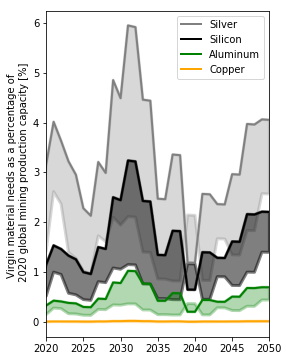

In [14]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keyw='VirginStock_'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

fig, axs = plt.subplots(1,1, figsize=(4, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)


# Loop over CASES
name2 = 'PV_ICE_high_[Tonnes]'
name0 = 'PV_ICE_base_[Tonnes]'
# ROW 2, Aluminum and Silicon:        g-  4 aluminum k - 1 silicon   orange - 3 copper  gray - 2 silver
axs.plot(USyearly[keyw+materials[2]+'_'+name2]*100/mining2020_silver, 
         color = 'gray', linewidth=2.0, label='Silver')

axs.fill_between(USyearly.index, USyearly[keyw+materials[2]+'_'+name0]*100/mining2020_silver, USyearly[keyw+materials[2]+'_'+name2]*100/mining2020_silver,
                   color='gray', lw=3, alpha=.3)
    

axs.plot(USyearly[keyw+materials[1]+'_'+name2]*100/mining2020_silicon, 
         color = 'k', linewidth=2.0, label='Silicon')
axs.fill_between(USyearly.index, USyearly[keyw+materials[1]+'_'+name0]*100/mining2020_silicon, 
                                USyearly[keyw+materials[1]+'_'+name2]*100/mining2020_silicon,
                   color='k', lw=3, alpha=.5)



axs.plot(USyearly[keyw+materials[4]+'_'+name2]*100/mining2020_aluminum, 
         color = 'g', linewidth=2.0, label='Aluminum')

axs.fill_between(USyearly.index, USyearly[keyw+materials[4]+'_'+name0]*100/mining2020_aluminum, 
                                USyearly[keyw+materials[4]+'_'+name2]*100/mining2020_aluminum,
                   color='g', lw=3, alpha=.3)



axs.plot(USyearly[keyw+materials[3]+'_'+name2]*100/mining2020_copper, 
         color = 'orange', linewidth=2.0, label='Copper')

axs.fill_between(USyearly.index, USyearly[keyw+materials[3]+'_'+name0]*100/mining2020_copper, 
                                USyearly[keyw+materials[3]+'_'+name2]*100/mining2020_copper,
                   color='orange', lw=3, alpha=.3)



axs.set_xlim([2020,2050])
axs.legend()
#axs.set_yscale('log')

axs.set_ylabel('Virgin material needs as a percentage of \n 2020 global mining production capacity [%]')

fig.savefig(os.path.join(testfolder,'Fig_1x1_MaterialNeeds Ratio to Production_NREL2018.png'), dpi=600)



# THRI PLOT

Cumulative Virgin Needs by 2050 Million Tones by Scenario
0     60.987163
1    123.400232
2    118.173774
3    118.201997
dtype: float64
Cumulative Virgin Needs by 2050 Million Tones by Scenario
0     6.736071
1     7.154406
2    25.379617
3    14.461644
dtype: float64


C:\Users\Silvana\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


Cumulative Virgin Needs by 2050 Million Tones by Scenario
0    1.859561e+00
1    3.611493e+00
2    3.801073e-16
3    3.801073e-16
dtype: float64


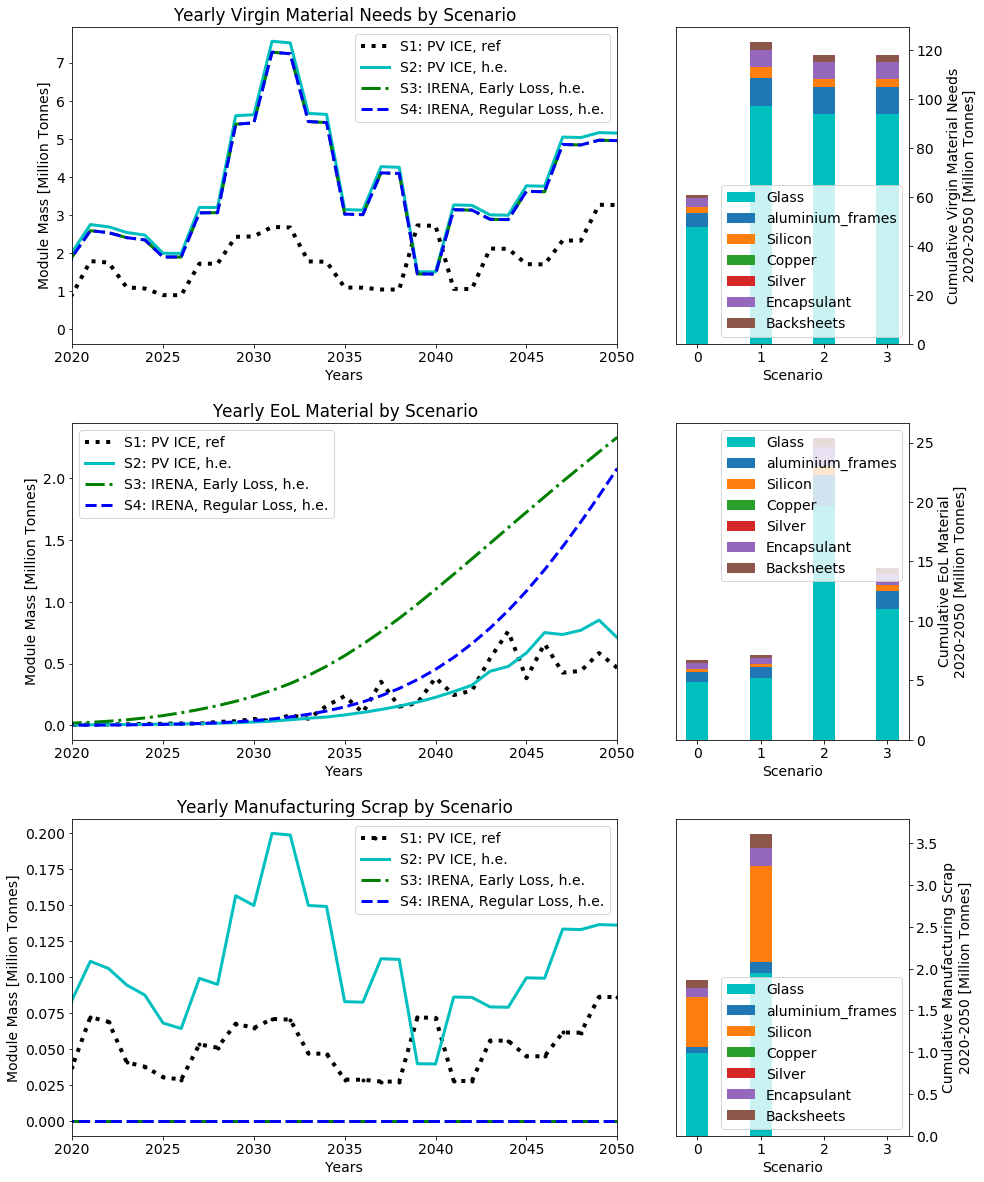

In [15]:
materials = ['glass', 'aluminium_frames', 'silicon', 'copper', 'silver', 'encapsulant', 'backsheet']
modulemat = 'Module'

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (15, 20.4)


f, a0 = plt.subplots(3, 2, gridspec_kw={'width_ratios': [3.5,1.5], 'wspace':0.15, 'hspace':0.25})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over CASES
name4 = 'Irena_RL_high_[Tonnes]'
name3 = 'Irena_EL_high_[Tonnes]'
name2 = 'PV_ICE_high_[Tonnes]'
name1 = 'PV_ICE_base_[Tonnes]'


# SCENARIO 1 ***************
keyw='VirginStock_'
a0[0,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name1]/1000000, 'k', linestyle='dotted', linewidth=4, label='S1: PV ICE, ref')
a0[0,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name2]/1000000, 'c', linewidth=3, label='S2: PV ICE, h.e.')
a0[0,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name3]/1000000, 'g', linestyle='dashdot', linewidth=3, label='S3: IRENA, Early Loss, h.e.')
a0[0,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name4]/1000000, 'b--', linewidth=3, label='S4: IRENA, Regular Loss, h.e.')

a0[0,0].legend()
a0[0,0].set_title('Yearly Virgin Material Needs by Scenario')
a0[0,0].set_ylabel('Module Mass [Million Tonnes]')
a0[0,0].set_xlim([2020, 2050])
a0[0,0].set_xlabel('Years')

########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name1].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name3].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name4].loc[2050])

    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']
dfcumulations2050['bottom5'] = dfcumulations2050['bottom4']+dfcumulations2050['silver']
dfcumulations2050['bottom6'] = dfcumulations2050['bottom5']+dfcumulations2050['encapsulant']



## Plot BARS Stuff
ind=np.arange(4)
width=0.35 # width of the bars.
p0 = a0[0,1].bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a0[0,1].bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a0[0,1].bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a0[0,1].bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a0[0,1].bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
p5 = a0[0,1].bar(ind, dfcumulations2050['encapsulant'], width,
             bottom=dfcumulations2050['bottom5'])
p6 = a0[0,1].bar(ind, dfcumulations2050['backsheet'], width,
             bottom=dfcumulations2050['bottom6'])

a0[0,1].yaxis.set_label_position("right")
a0[0,1].yaxis.tick_right()
a0[0,1].set_ylabel('Cumulative Virgin Material Needs\n2020-2050 [Million Tonnes]')
a0[0,1].set_xlabel('Scenario')
a0[0,1].set_xticks(ind, ('S1', 'S2', 'S3', 'S4'))
#plt.yticks(np.arange(0, 81, 10))
a0[0,1].legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), 
          ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver', 'Encapsulant', 'Backsheets' ))

print("Cumulative Virgin Needs by 2050 Million Tones by Scenario")
print(dfcumulations2050[materials].sum(axis=1))


#################################
# ROW 2
################################

# SCENARIO 1 ***************
keyw='WasteEOL_'
a0[1,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name1]/1000000, 'k', linestyle='dotted', linewidth=4, label='S1: PV ICE, ref')
a0[1,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name2]/1000000, 'c', linewidth=3, label='S2: PV ICE, h.e.')
a0[1,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name3]/1000000, 'g', linestyle='dashdot', linewidth=3, label='S3: IRENA, Early Loss, h.e.')
a0[1,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name4]/1000000, 'b--', linewidth=3, label='S4: IRENA, Regular Loss, h.e.')

a0[1,0].legend()
a0[1,0].set_title('Yearly EoL Material by Scenario')
a0[1,0].set_ylabel('Module Mass [Million Tonnes]')
a0[1,0].set_xlim([2020, 2050])
a0[1,0].set_xlabel('Years')

########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name1].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name3].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name4].loc[2050])

    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']
dfcumulations2050['bottom5'] = dfcumulations2050['bottom4']+dfcumulations2050['silver']
dfcumulations2050['bottom6'] = dfcumulations2050['bottom5']+dfcumulations2050['encapsulant']



## Plot BARS Stuff
ind=np.arange(4)
width=0.35 # width of the bars.
p0 = a0[1,1].bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a0[1,1].bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a0[1,1].bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a0[1,1].bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a0[1,1].bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
p5 = a0[1,1].bar(ind, dfcumulations2050['encapsulant'], width,
             bottom=dfcumulations2050['bottom5'])
p6 = a0[1,1].bar(ind, dfcumulations2050['backsheet'], width,
             bottom=dfcumulations2050['bottom6'])

a0[1,1].yaxis.set_label_position("right")
a0[1,1].yaxis.tick_right()
a0[1,1].set_ylabel('Cumulative EoL Material\n2020-2050 [Million Tonnes]')
a0[1,1].set_xlabel('Scenario')
a0[1,1].set_xticks(ind, ('S1', 'S2', 'S3', 'S4'))
#plt.yticks(np.arange(0, 81, 10))
a0[1,1].legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), 
          ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver', 'Encapsulant', 'Backsheets' ),
              loc='upper right')


print("Cumulative Virgin Needs by 2050 Million Tones by Scenario")
print(dfcumulations2050[materials].sum(axis=1))





#################################
# ROW 3
################################

# SCENARIO 1 ***************
keyw='WasteMFG_'
a0[2,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name1]/1000000, 'k.', linestyle='dotted', linewidth=4, label='S1: PV ICE, ref')
a0[2,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name2]/1000000, 'c', linewidth=3, label='S2: PV ICE, h.e.')
a0[2,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name3]/1000000, 'g', linestyle='dashdot', linewidth=3, label='S3: IRENA, Early Loss, h.e.')
a0[2,0].plot(USyearly.index, USyearly[keyw+modulemat+'_'+name4]/1000000, 'b--', linewidth=3, label='S4: IRENA, Regular Loss, h.e.')

a0[2,0].legend()
a0[2,0].set_title('Yearly Manufacturing Scrap by Scenario')
a0[2,0].set_ylabel('Module Mass [Million Tonnes]')
a0[2,0].set_xlim([2020, 2050])
a0[2,0].set_xlabel('Years')

########################    
# SUBPLOT 2
########################
#######################
# Calculate    

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name1].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name3].loc[2050])
    matcum.append(UScum[keyw+materials[ii]+'_'+name4].loc[2050])

    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminium_frames']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']
dfcumulations2050['bottom5'] = dfcumulations2050['bottom4']+dfcumulations2050['silver']
dfcumulations2050['bottom6'] = dfcumulations2050['bottom5']+dfcumulations2050['encapsulant']



## Plot BARS Stuff
ind=np.arange(4)
width=0.35 # width of the bars.
p0 = a0[2,1].bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a0[2,1].bar(ind, dfcumulations2050['aluminium_frames'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a0[2,1].bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a0[2,1].bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a0[2,1].bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
p5 = a0[2,1].bar(ind, dfcumulations2050['encapsulant'], width,
             bottom=dfcumulations2050['bottom5'])
p6 = a0[2,1].bar(ind, dfcumulations2050['backsheet'], width,
             bottom=dfcumulations2050['bottom6'])

a0[2,1].yaxis.set_label_position("right")
a0[2,1].yaxis.tick_right()
a0[2,1].set_ylabel('Cumulative Manufacturing Scrap\n2020-2050 [Million Tonnes]')
a0[2,1].set_xlabel('Scenario')
a0[2,1].set_xticks(ind, ('S1', 'S2', 'S3', 'S4'))
#plt.yticks(np.arange(0, 81, 10))
a0[2,1].legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), 
          ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver', 'Encapsulant', 'Backsheets' ),
              loc='lower right')

f.tight_layout()

f.savefig(os.path.join(testfolder,'THRI_PLOT.png'), dpi=600)

print("Cumulative Virgin Needs by 2050 Million Tones by Scenario")
print(dfcumulations2050[materials].sum(axis=1))

# TABLE 7: METRIC TONNES IN FIELD IN 2030

In [16]:
names = ['PV_ICE_base', 'PV_ICE_high', 'Irena_EL_base', 'Irena_EL_high', 'Irena_RL_base', 'Irena_RL_high']
materials = ['Module', 'glass', 'encapsulant', 'backsheet', 'aluminium_frames', 'copper', 'silicon', 'silver']


In [17]:
print("TABLE 7 - METRIC TONNES IN FIELD IN 2030")

tableapp=[]
for name in names:
    colapp=[]
    for mat in materials:
         colapp.append(UScum.filter(regex='VirginStock_'+mat+'_'+name).loc[2030][0]-
                       UScum.filter(regex='WasteAll_'+mat+'_'+name).loc[2030][0])
    tableapp.append(colapp)
    
df= pd.DataFrame(tableapp, columns = materials, index=names)
df = df.T
df

TABLE 7 - METRIC TONNES IN FIELD IN 2030


,PV_ICE_base,PV_ICE_high,Irena_EL_base,Irena_EL_high,Irena_RL_base,Irena_RL_high
Module,2.036640e+07,3.724469e+07,1.932354e+07,3.566844e+07,2.009474e+07,3.665697e+07
glass,1.561500e+07,2.878685e+07,1.482745e+07,2.758558e+07,1.538691e+07,2.830936e+07
encapsulant,1.316037e+06,2.362754e+06,1.265048e+06,2.291383e+06,1.321796e+06,2.363458e+06
backsheet,6.393244e+05,1.124021e+06,6.111621e+05,1.086486e+06,6.406945e+05,1.123482e+06
aluminium_frames,2.115684e+06,3.772651e+06,2.034861e+06,3.656371e+06,2.132894e+06,3.777842e+06
copper,1.371594e+04,2.520383e+04,1.215885e+04,2.253002e+04,1.262470e+04,2.314878e+04
silicon,6.605255e+05,1.162884e+06,5.679081e+05,1.017859e+06,5.945188e+05,1.051050e+06
silver,6.118902e+03,1.032704e+04,4.950071e+03,8.228248e+03,5.300341e+03,8.636420e+03


In [121]:
print("Table 7 Effective Capacity PV ICE, Reference", round(USyearly['Capacity_PV_ICE_base_[MW]'].loc[2030]/1000,1))
print("Table 7 Effective Capacity PV ICE, Reference", round(USyearly['Capacity_PV_ICE_high_[MW]'].loc[2030]/1000,1))

Table 7 Effective Capacity PV ICE, Reference 347.7
Table 7 Effective Capacity PV ICE, Reference 649.9


# Figure 12 Cumulative EOL MAterial, 2016, 2020, 2030, 2040, 2050

In [128]:
names = ['Irena_EL_base', 'Irena_RL_base', 'PV_ICE_base']

In [129]:
print("Figure 12 - Cumulative EOL Material 2016, 2020, 2030, 240, 2050")

years = [2016, 2020, 2030, 2040, 2050]
tableapp=[]
for name in names:
    colapp=[]
    for year in years:
         colapp.append(UScum.filter(regex='WasteEOL_Module_'+name).loc[year][0])
    tableapp.append(colapp)
    
df= pd.DataFrame(tableapp, columns = years, index=names)
df = df.T 
df

Figure 12 - Cumulative EOL Material 2016, 2020, 2030, 240, 2050


,Irena_EL_base,Irena_RL_base,PV_ICE_base
2016,1.381445e+04,9.643520e+02,1.121809e+04
2020,6.152393e+04,4.129162e+03,2.344797e+04
2030,9.002049e+05,1.316236e+05,2.115712e+05
2040,4.623097e+06,1.717699e+06,1.949848e+06
2050,1.322723e+07,8.881812e+06,6.736071e+06


# FIX THIS NUMBER!

In [130]:
df.insert(loc=0, column='Irena 2016 Early Loss', value=[9000, 11000,110000,1000000,8000000])
df.insert(loc=1, column='Irena 2016 Regular Loss', value=[9000, 11000,110000,1000000,8000000])
df.insert(loc=2, column='CSA 2020 Early Loss', value=[9000, 11000,110000,1000000,8000000])
df.insert(loc=3, column='CSA 2020 Regular Loss', value=[9000, 11000,110000,1000000,8000000])

In [131]:
import matplotlib.ticker as ticker
import numpy as np

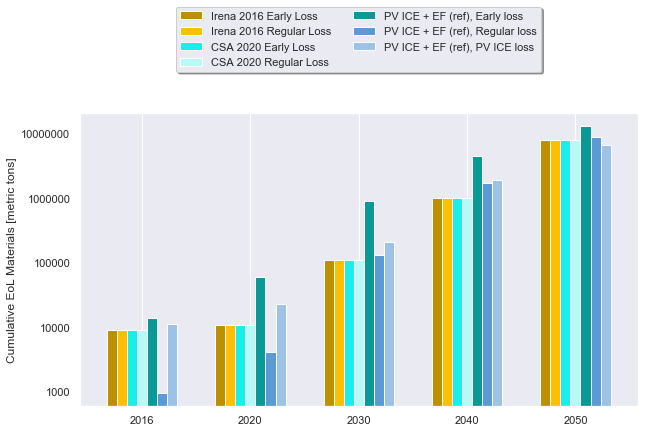

In [132]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 6)


my_colors=[(0.74609375, 0.5625, 0),
(0.99609375, 0.75, 0),
(0.09375, 0.9375, 0.91796875),
(0.71875, 0.9765625, 0.96875),
(0.0390625, 0.6015625, 0.58984375),
(0.35546875, 0.60546875, 0.83203125),
(0.61328125, 0.76171875, 0.8984375)]


#ax = df.plot(kind='bar', edgecolor='white', linewidth=1, width=0.65, colormap='Paired') #color=my_colors)# width=0.5)
ax = df.plot(kind='bar', edgecolor='white', linewidth=1, width=0.65, color=my_colors)# width=0.5)

ax.set_yscale('log')
ax.grid(axis='y')
ax.set_axisbelow(b=True) # Set grid behind plots
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax.set_xticklabels(df.index, rotation = 0)
ax.set_ylabel('Cumulative EoL Materials [metric tons]')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax.legend(['Irena 2016 Early Loss', 'Irena 2016 Regular Loss', 'CSA 2020 Early Loss', 'CSA 2020 Regular Loss',
          'PV ICE + EF (ref), Early loss', 'PV ICE + EF (ref), Regular loss', 'PV ICE + EF (ref), PV ICE loss'], 
          loc='upper center', bbox_to_anchor=(0.5, 1.38), fancybox=True, shadow=True, ncol=2)

plt.show()


In [133]:
# Some options Silvana liked
# vlag_r, viridis, tab20b, tab10_r, rainbow_r, plasma, nipy_spectral_r

# ALL OPTIONS
# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


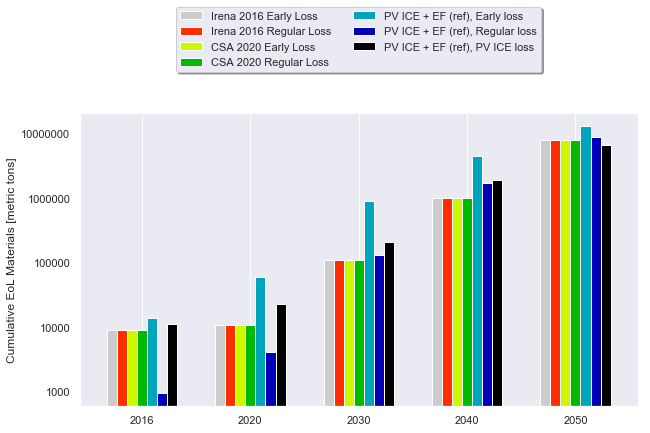

In [134]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 6)


my_colors=[(0.74609375, 0.5625, 0),
(0.99609375, 0.75, 0),
(0.09375, 0.9375, 0.91796875),
(0.71875, 0.9765625, 0.96875),
(0.0390625, 0.6015625, 0.58984375),
(0.35546875, 0.60546875, 0.83203125),
(0.61328125, 0.76171875, 0.8984375)]



ax = df.plot(kind='bar', edgecolor='white', linewidth=1, width=0.65, colormap='nipy_spectral_r') #color=my_colors)# width=0.5)

ax.set_yscale('log')
ax.grid(axis='y')
ax.set_axisbelow(b=True) # Set grid behind plots
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax.set_xticklabels(df.index, rotation = 0)
ax.set_ylabel('Cumulative EoL Materials [metric tons]')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax.legend(['Irena 2016 Early Loss', 'Irena 2016 Regular Loss', 'CSA 2020 Early Loss', 'CSA 2020 Regular Loss',
          'PV ICE + EF (ref), Early loss', 'PV ICE + EF (ref), Regular loss', 'PV ICE + EF (ref), PV ICE loss'], 
          loc='upper center', bbox_to_anchor=(0.5, 1.38), fancybox=True, shadow=True, ncol=2)

plt.show()


# Figure 11 Installed Capacity for all Scenarios

In [136]:
names = ['PV_ICE_base', 'PV_ICE_high', 'Irena_EL_base', 'Irena_EL_high', 'Irena_RL_base', 'Irena_RL_high']

In [137]:
print("Figure 11 Installed CApacity for all Scenarios")

years = [2030, 2050]
tableapp=[]
for name in names:
    colapp=[]
    for year in years:
         colapp.append(USyearly.filter(regex='Capacity_'+name).loc[year][0])
    tableapp.append(colapp)
    
df= pd.DataFrame(tableapp, columns = years, index=names)
df = df.T 
df

Figure 11 Installed CApacity for all Scenarios


,PV_ICE_base,PV_ICE_high,Irena_EL_base,Irena_EL_high,Irena_RL_base,Irena_RL_high
2030,347663.427184,6.499061e+05,336518.834617,6.342028e+05,348325.122311,6.497835e+05
2050,932934.904870,1.985043e+06,813398.139215,1.666864e+06,890994.597619,1.859524e+06


In [138]:
df['PV_ICE_increase_high'] = df['PV_ICE_high']-df['PV_ICE_base']
df['Irena_EL_increase_high'] = df['Irena_EL_high']-df['Irena_EL_base']
df['Irena_RL_increase_high'] = df['Irena_RL_high']-df['Irena_RL_base']
df['Irena 2016'] = [240000, 512000]
df['CSA 2000'] = [437000, 0]
df['inc0'] = [0, 0]


In [139]:
df

,PV_ICE_base,PV_ICE_high,Irena_EL_base,Irena_EL_high,Irena_RL_base,Irena_RL_high,PV_ICE_increase_high,Irena_EL_increase_high,Irena_RL_increase_high,Irena 2016,CSA 2000,inc0
2030,347663.427184,6.499061e+05,336518.834617,6.342028e+05,348325.122311,6.497835e+05,3.022427e+05,297683.927995,301458.412995,240000,437000,0
2050,932934.904870,1.985043e+06,813398.139215,1.666864e+06,890994.597619,1.859524e+06,1.052108e+06,853466.131207,968529.222303,512000,0,0


['Irena_EL_base', 'Irena_EL_increase_high']


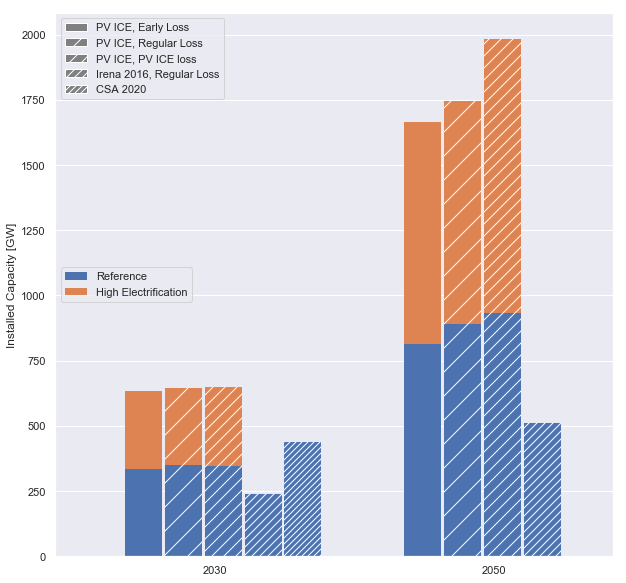

In [140]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (10, 10)


def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1)-0.01)

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

#    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    l1 = axe.legend(h[:n_col], ['Reference', 'High Electrification'], loc='center left')
    print(l[:n_col])
    if labels is not None:
       # print(labels)
#        l2 = plt.legend(n, labels, loc=[1.01, 0.1])
        l2 = plt.legend(n, labels, loc='upper left')#[1.01, 0.1])

    axe.add_artist(l1)
    axe.set_ylabel('Installed Capacity [GW]')
    axe.grid(axis='y')
    axe.set_axisbelow(b=True) # Set grid behind plots
    return axe

# create fake dataframes
df1 = df[['Irena_EL_base', 'Irena_EL_increase_high']]/1000
df2 = df[['Irena_RL_base', 'Irena_EL_increase_high']]/1000
df3 = df[['PV_ICE_base', 'PV_ICE_increase_high']]/1000
df4 = df[['Irena 2016', 'inc0']]/1000
df5 = df[['CSA 2000', 'inc0']]/1000
df6 = df[['inc0', 'inc0']]/1000

# Then, just call :
plot_clustered_stacked([df1, df2, df3, df4, df5, df6],["PV ICE, Early Loss", "PV ICE, Regular Loss", "PV ICE, PV ICE loss", "Irena 2016, Regular Loss", "CSA 2020"], title='')
    

# Sensitivity Analysis

In [32]:
MATERIAL = 'glass'

MODULEBASELINE = r'..\..\baselines\baseline_modules_US.csv' 
MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIAL+'.csv'

In [33]:
s1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
s1.createScenario(name='baseline', file=MODULEBASELINE)
s1.scenario['baseline'].addMaterial(MATERIAL, file=MATERIALBASELINE)


path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\ElectricFutures


#### Load Scenarios and Parameters

In [34]:
ss = pd.read_excel(r'..\..\..\tests\sensitivity_test.xlsx')

#### Create Scenarios

In [35]:
for i in range (0, len(ss)):
    stage = ss['stage'][i]
    stage_highname = stage+'_high'
    stage_lowname = stage+'_low'
    
    if ss['Database'][i] == 'material':

        if ss['Modification'][i] == 'single':

            # Create Scenarios
            s1.createScenario(name=stage_highname, file=MODULEBASELINE)
            s1.scenario[stage_highname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            s1.createScenario(name=stage_lowname, file=MODULEBASELINE)
            s1.scenario[stage_lowname].addMaterial(MATERIAL, file=MATERIALBASELINE)

            # Modify Values Absolute
            if ss['AbsRel'][i] == 'abs':
                # Modify Values High
                s1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]] = s1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]] + ss['High'][i]
                s1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]][s1.scenario[stage_highname].material[MATERIAL].materialdata[ss['variables'][i]]>100.0] =100.0
                # Modify Values Low
                s1.scenario[stage_lowname].material[MATERIAL].materialdata[ss['variables'][i]] = s1.scenario[stage_lowname].material[MATERIAL].materialdata[ss['variables'][i]] + ss['Low'][i]
                s1.scenario[stage_lowname].material[MATERIAL].materialdata[ss['variables'][i]][s1.scenario[stage_lowname].material[MATERIAL].materialdata[ss['variables'][i]]<0.0] = 0.0

            # Modify Values Relative
            if ss['AbsRel'][i] == 'rel':
                # Modify Values High
                high_change = 1+ss['High'][i]/100.0
                low_change = 1+ss['Low'][i]/100.0
                s1.scenario[stage_highname].material[MATERIAL].materialdata = PV_ICE.sens_StageImprovement(s1.scenario[stage_highname].material[MATERIAL].materialdata, 
                             stage=ss['variables'][i], improvement=high_change, start_year=0)
                # Modify Values Low
                s1.scenario[stage_lowname].material[MATERIAL].materialdata = PV_ICE.sens_StageImprovement(s1.scenario[stage_lowname].material[MATERIAL].materialdata, 
                             stage=ss['variables'][i], improvement=low_change, start_year=0)
          
        # If multiple, assumed all modifications are ABSOLUTE
        if ss['Modification'][i] == 'multiple':
            varmods = [x.strip() for x in ss['variables'][i].split(',')]
            
            # Create Scenarios
            s1.createScenario(name=stage_highname, file=MODULEBASELINE)
            s1.scenario[stage_highname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            s1.createScenario(name=stage_lowname, file=MODULEBASELINE)
            s1.scenario[stage_lowname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            
            for j in range(0, len(varmods)):
                # Modify Values High
                s1.scenario[stage_highname].material[MATERIAL].materialdata[varmods[j]] = s1.scenario[stage_highname].material[MATERIAL].materialdata[varmods[j]] + ss['High'][i] 
                s1.scenario[stage_highname].material[MATERIAL].materialdata[varmods[j]][s1.scenario[stage_highname].material[MATERIAL].materialdata[varmods[j]]>100.0] =100.0
                # Modify Values Low
                s1.scenario[stage_lowname].material[MATERIAL].materialdata[varmods[j]] = s1.scenario[stage_lowname].material[MATERIAL].materialdata[varmods[j]] + ss['Low'][i]
                s1.scenario[stage_lowname].material[MATERIAL].materialdata[varmods[j]][s1.scenario[stage_lowname].material[MATERIAL].materialdata[varmods[j]]<0.0] = 0.0

        
    if ss['Database'][i] == 'module':
        
        
        if ss['Modification'][i] == 'single':

            # Create Scenarios
            s1.createScenario(name=stage_highname, file=MODULEBASELINE)
            s1.scenario[stage_highname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            s1.createScenario(name=stage_lowname, file=MODULEBASELINE)
            s1.scenario[stage_lowname].addMaterial(MATERIAL, file=MATERIALBASELINE) 
            # Modify Values Absolute
            if ss['AbsRel'][i] == 'abs':


                s1.scenario[stage_highname].data[ss['variables'][i]] = s1.scenario[stage_highname].data[ss['variables'][i]] + ss['High'][i]
                s1.scenario[stage_highname].data[ss['variables'][i]][s1.scenario[stage_highname].data[ss['variables'][i]]>100.0] =100.0


                s1.scenario[stage_lowname].data[ss['variables'][i]] = s1.scenario[stage_lowname].data[ss['variables'][i]] + ss['Low'][i]
                s1.scenario[stage_lowname].data[ss['variables'][i]][s1.scenario[stage_lowname].data[ss['variables'][i]]<0.0] = 0.0

            # Modify Values Relative
            if ss['AbsRel'][i] == 'rel':
                high_change = 1+ss['High'][i]/100.0
                low_change = 1+ss['Low'][i]/100.0
                s1.scenario[stage_highname].data = PV_ICE.sens_StageImprovement(s1.scenario[stage_highname].data, 
                                                 stage=ss['variables'][i], improvement=high_change, start_year=0)
                s1.scenario[stage_lowname].data = PV_ICE.sens_StageImprovement(s1.scenario[stage_lowname].data, 
                                                 stage=ss['variables'][i], improvement=low_change, start_year=0)
        
        # If multiple, assumed all modifications are ABSOLUTE
        if ss['Modification'][i] == 'multiple':
            varmods = [x.strip() for x in ss['variables'][i].split(',')]

            s1.createScenario(name=stage_highname, file=MODULEBASELINE)
            s1.scenario[stage_highname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            s1.createScenario(name=stage_lowname, file=MODULEBASELINE)
            s1.scenario[stage_lowname].addMaterial(MATERIAL, file=MATERIALBASELINE)
            
            for j in range(0, len(varmods)):
                s1.scenario[stage_highname].data[varmods[j]] = s1.scenario[stage_highname].data[varmods[j]] + ss['High'][i] 
                s1.scenario[stage_highname].data[varmods[j]][s1.scenario[stage_highname].data[varmods[j]]>100.0] =100.0

                s1.scenario[stage_lowname].data[varmods[j]] = s1.scenario[stage_lowname].data[varmods[j]] + ss['Low'][i]
                s1.scenario[stage_lowname].data[varmods[j]][s1.scenario[stage_lowname].data[varmods[j]]<0.0] = 0.0

        

C:\Users\Silvana\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Silvana\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Silvana\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Silvana\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

# MASS FLOWS

In [36]:
s1.calculateMassFlow(m1=m1,m2=m2,m3=m3)


Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycl

#### Compile Changes

In [40]:
s1.scenario

{'baseline': <PV_ICE.main.Scenario at 0xd2ce7f22b0>,
 'mat_virgin_eff_high': <PV_ICE.main.Scenario at 0xd2ce9195f8>,
 'mat_virgin_eff_low': <PV_ICE.main.Scenario at 0xd2ce8dfe80>,
 'mat_massperm2_high': <PV_ICE.main.Scenario at 0xd2ce8ab5c0>,
 'mat_massperm2_low': <PV_ICE.main.Scenario at 0xd2ce705438>,
 'mat_MFG_eff_high': <PV_ICE.main.Scenario at 0xd2cdb01860>,
 'mat_MFG_eff_low': <PV_ICE.main.Scenario at 0xd2ce616198>,
 'mat_MFG_scrap_Recycled_high': <PV_ICE.main.Scenario at 0xd2cd255160>,
 'mat_MFG_scrap_Recycled_low': <PV_ICE.main.Scenario at 0xd2ce6c9940>,
 'mat_MFG_scrap_Recycling_eff_high': <PV_ICE.main.Scenario at 0xd2cd202cc0>,
 'mat_MFG_scrap_Recycling_eff_low': <PV_ICE.main.Scenario at 0xd2d0367320>,
 'mat_MFG_scrap_Recycled_into_HQ_high': <PV_ICE.main.Scenario at 0xd2d0367b00>,
 'mat_MFG_scrap_Recycled_into_HQ_low': <PV_ICE.main.Scenario at 0xd2ce74c320>,
 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_high': <PV_ICE.main.Scenario at 0xd2ce74cfd0>,
 'mat_MFG_scrap_Recycled_int

In [46]:
scenarios = list(s1.scenario.keys())

In [47]:
virginStock_Changes = []
waste_Changes = []
installedCapacity_Changes = []
virginStockRAW_Changes = []

virgin_keyword = 'mat_Virgin_Stock'
waste_keyword = 'mat_Total_Landfilled'
installs_keyword = 'Installed_Capacity_[W]'
viring_raw_keyword = 'mat_Virgin_Stock_Raw'

virginStock_baseline_cum2050 = s1.scenario['baseline'].material[MATERIAL].materialdata[virgin_keyword].sum()
virginStockRAW_baseline_cum2050 = s1.scenario['baseline'].material[MATERIAL].materialdata[viring_raw_keyword].sum()

# Installed Capacity is already cumulative so no need to sum or cumsum.
waste_baseline_cum2050 = s1.scenario['baseline'].material[MATERIAL].materialdata[waste_keyword].sum()
installedCapacity_baselined_2050 = s1.scenario['baseline'].data[installs_keyword].iloc[-1]

for i in range (1, len(scenarios)):
    stage_name = scenarios[i]
    virginStock_Changes.append(round(100*s1.scenario[stage_name].material[MATERIAL].materialdata[virgin_keyword].sum()/virginStock_baseline_cum2050,5)-100)
    virginStockRAW_Changes.append(round(100*s1.scenario[stage_name].material[MATERIAL].materialdata[viring_raw_keyword].sum()/virginStockRAW_baseline_cum2050,5)-100)

    waste_Changes.append(round(100*s1.scenario[stage_name].material[MATERIAL].materialdata[waste_keyword].sum()/waste_baseline_cum2050,5)-100)
    installedCapacity_Changes.append(round(100*s1.scenario[stage_name].data[installs_keyword].iloc[-1]/installedCapacity_baselined_2050,5)-100)

In [48]:
stages = scenarios[1::] # removing baseline as we want a dataframe with only changes

In [49]:
df2 = pd.DataFrame(list(zip(virginStock_Changes, virginStockRAW_Changes, waste_Changes, installedCapacity_Changes)), 
               columns=['Virgin Needs Change', 'Virgin Stock Raw Change', 'Waste Change', 'InstalledCapacity Change'],index=stages) 

In [50]:
variables_description = {'mat_virgin_eff': "Material Virgin Efficiency",
    'mat_massperm2': "Mass per m2",
    'mat_MFG_eff': "Efficiency of Material Use during Module Manufacturing",
    'mat_MFG_scrap_Recycled': "% of Material Scrap from Manufacturing that undergoes Recycling",
    'mat_MFG_scrap_Recycling_eff': "Recycling Efficiency of the Material Scrap",
    'mat_MFG_scrap_Recycling_eff': "% of Recycled Material Scrap that is high quality",
    'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG': "% of high quality Recycled Material Scrap reused for manufacturing",
    'new_Installed_Capacity_[MW]': "New Installed Capacity",
    'mod_eff': "Module Efficiency",
    'mod_EOL_collection_eff': "Collection Efficiency of EoL Modules",
    'mod_EOL_collected_recycled': "% of collected modules that are recycled",
    'mod_Repowering': "% of EOL modules that are repowered",
    'mod_Repairing' : "% of failed modules that undergo repair",
    'mat_EOL_collected_Recycled': "% of times material is chosen to be recycled",
    'mat_EOL_Recycling_eff': "Efficiency of material recycling",
    'mat_EOL_Recycled_into_HQ': "Fraction of recycled material that is high quality",
    'mat_EOL_RecycledHQ_Reused4MFG': "Fraction of high quality recycled material that is reused for manufacturing",
    'EOL_CE_Pathways': "Overall improvement on EoL Circularity Pathways",
    'Reliability_and_CE_Pathways': "Overall improvement on Eol Circularity Pathways + Reliability and Lifetime",
    'mat_EOL_Recycling_Overall_Improvement': "Overall Improvement on EoL Recycling Loop"}


In [51]:
df2_Pos = df2[['high' in s for s in df2.index]].copy()
df2_Pos.index = df2_Pos.index.str.replace("_high", "")

col_verbose = []

for i in range (0, len(df2_Pos)):
    if df2_Pos.index[i] in variables_description:
        col_verbose.append(variables_description[df2_Pos.index[i]])
    else:
        col_verbose.append("")
        
df2_Pos['Description'] = col_verbose     
df2_Pos = df2_Pos.reset_index()
df2_Pos = df2_Pos.rename(columns={'index':'variable'})
df2_Pos


,variable,Virgin Needs Change,Virgin Stock Raw Change,Waste Change,InstalledCapacity Change,Description
0,mat_virgin_eff,0.00000,-0.10000,0.00000,0.00000,Material Virgin Efficiency
1,mat_massperm2,9.99989,9.99989,9.99750,0.00000,Mass per m2
2,mat_MFG_eff,-1.25353,-1.25353,-9.56391,0.00000,Efficiency of Material Use during Module Manuf...
3,mat_MFG_scrap_Recycled,-0.00324,-0.00324,-2.04282,0.00000,% of Material Scrap from Manufacturing that un...
4,mat_MFG_scrap_Recycling_eff,-0.00518,-0.00518,-3.26852,0.00000,% of Recycled Material Scrap that is high quality
5,mat_MFG_scrap_Recycled_into_HQ,-0.01296,-0.01296,0.00000,0.00000,
6,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,-0.02591,-0.02591,0.00000,0.00000,% of high quality Recycled Material Scrap reus...
7,mat_MFG_Scrap_Overall_Improvement,-0.07903,-0.07903,-5.71991,0.00000,
8,mat_EOL_collected_Recycled,-0.00018,-0.00018,-0.18517,0.00000,% of times material is chosen to be recycled
9,mat_EOL_Recycling_eff,-0.00040,-0.00040,-0.41662,0.00000,Efficiency of material recycling


In [52]:
df2_Neg = df2[['low' in s for s in df2.index]].copy()
df2_Neg.index = df2_Neg.index.str.replace("_low", "")

col_verbose = []

for i in range (0, len(df2_Neg)):
    if df2_Neg.index[i] in variables_description:
        col_verbose.append(variables_description[df2_Neg.index[i]])
    else:
        col_verbose.append("")

df2_Neg['Description'] = col_verbose
df2_Neg = df2_Neg.reset_index()
df2_Neg = df2_Neg.rename(columns={'index':'variable'})
df2_Neg

,variable,Virgin Needs Change,Virgin Stock Raw Change,Waste Change,InstalledCapacity Change,Description
0,mat_virgin_eff,0.00000,11.12347,0.00000,0.00000,Material Virgin Efficiency
1,mat_massperm2,-9.99989,-9.99989,-9.99750,0.00000,Mass per m2
2,mat_MFG_eff,11.18308,11.18308,85.32225,0.00000,Efficiency of Material Use during Module Manuf...
3,mat_MFG_scrap_Recycled,0.00324,0.00324,2.04282,0.00000,% of Material Scrap from Manufacturing that un...
4,mat_MFG_scrap_Recycling_eff,0.00518,0.00518,3.26852,0.00000,% of Recycled Material Scrap that is high quality
5,mat_MFG_scrap_Recycled_into_HQ,0.01296,0.01296,0.00000,0.00000,
6,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,0.02591,0.02591,0.00000,0.00000,% of high quality Recycled Material Scrap reus...
7,mat_MFG_Scrap_Overall_Improvement,0.02591,0.02591,4.90278,0.00000,
8,mat_EOL_collected_Recycled,0.00018,0.00018,0.18517,0.00000,% of times material is chosen to be recycled
9,mat_EOL_Recycling_eff,0.00040,0.00040,0.41662,0.00000,Efficiency of material recycling


# Modifing the installed capacity to stay fixed at BASELINE
Needs to run each year becuase it needs to calculate the acumulated installs and deads.

In [53]:
Diff_Installment = []
for i in range (0, len(s1.scenario['baseline'].data)):
    for jj in range (1, len(list(s1.scenario.keys()))):
        scen = list(s1.scenario.keys())[jj]
        Diff_Installment = ( (s1.scenario['baseline'].data['Installed_Capacity_[W]'][i] - 
                             s1.scenario[scen].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
        s1.scenario[scen].data['new_Installed_Capacity_[MW]'][i] += Diff_Installment
    s1.calculateMassFlow(m1=False, m2=False, m3=True)


C:\Users\Silvana\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycl

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_Scrap_Overall_Improvement_high
********************
Finished Area+Power Generation Calculations
=

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_RecycledHQ_Reused4MFG_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_RecycledHQ_Reused4MFG_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliability_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliability_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_low
********************
Finished Area+Power Generation Calcul

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Repair_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Repair_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  EOL_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  EOL_CE_Pathways_low
********************
Finished Area+Power Generati

Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycl

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_Scrap_Overall_Improvement_high
********************
Finished Area+Power Generation Calculations
=

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_RecycledHQ_Reused4MFG_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_RecycledHQ_Reused4MFG_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliability_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliability_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_low
********************
Finished Area+Power Generation Calcul

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Repair_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Repair_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  EOL_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  EOL_CE_Pathways_low
********************
Finished Area+Power Generati

Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycl

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_Scrap_Overall_Improvement_high
********************
Finished Area+Power Generation Calculations
=

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_RecycledHQ_Reused4MFG_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_RecycledHQ_Reused4MFG_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliability_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliability_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_low
********************
Finished Area+Power Generation Calcul

Working on Scenario:  mod_EOL_collected_recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Repair_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Repair_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  EOL_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scena

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_low
********************
Finished Area+Power Generation Calculation

Working on Scenario:  mat_MFG_scrap_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_Scrap_Overall_Improve

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_collected_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_RecycledHQ_Reused4MFG_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliability_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliability_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_high
********************
Finished Area+Power 

Working on Scenario:  mod_EOL_collection_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Repair_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Repair_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on

Working on Scenario:  Reliability_and_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Reliability_and_CE_Pathways_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_high
********************
Finished Area+Power Generation Calculations
==> Working on Material : 

Working on Scenario:  mat_MFG_Scrap_Overall_Improvement_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_collected_Recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_collected_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_low
********************
Finished Area+Power Gene

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_Overall_Improvement_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliability_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliability_low
****************

Working on Scenario:  mod_EOL_collection_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collection_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Repair_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  gla

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Reliability_and_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Reliability_and_CE_Pathways_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_low
********************
Finished A

Working on Scenario:  mat_MFG_scrap_Recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_high
********************

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_Scrap_Overall_Improvement_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_collected_Recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_collected_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_Overall_Improvement_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_Overall_Improvement_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliab

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collection_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collection_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_low
******************

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  EOL_CE_Pathways_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Reliability_and_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Reliability_and_CE_Pathways_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_massperm2_high
********************
Finished

Working on Scenario:  mat_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_low
********************
Finished Area+Power Generation

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_Scrap_Overall_Improvement_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_collected_Recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_collected_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_Overall_Improvement_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_Overall_Improvement_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  reliab

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collection_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collection_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_low
******************

Working on Scenario:  EOL_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  EOL_CE_Pathways_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Reliability_and_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Reliability_and_CE_Pathways_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Workin

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_s

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_Scrap_Overall_Improvement_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_Scrap_Overall_Improvement_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_collected_Recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_collected_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_RecycledHQ_Reused4MFG_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_Overall_Improvement_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_Overall_Improvement_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Workin

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collection_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collection_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Reuse_high
***************

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  EOL_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  EOL_CE_Pathways_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Reliability_and_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Reliability_and_CE_Pathways_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_low
********************
Finish

Working on Scenario:  mat_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_high
********************
Finished Area+Power Generation Calculations
==> 

Working on Scenario:  mat_MFG_scrap_Recycled_into_HQ_Reused4MFG_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_Scrap_Overall_Improvement_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_Scrap_Overall_Improvement_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_collected_Recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_collected_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_eff_low
*******************

Working on Scenario:  mat_EOL_RecycledHQ_Reused4MFG_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_RecycledHQ_Reused4MFG_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_Overall_Improvement_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_EOL_Recycling_Overall_Improvement_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  new_Installed_Capacity_[MW]_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_eff_high
********************
Finis

Working on Scenario:  reliability_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collection_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collection_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_EOL_collected_recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material : 

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mod_Repair_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  EOL_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  EOL_CE_Pathways_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Reliability_and_CE_Pathways_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Reliability_and_CE_Pathways_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  baseline
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_virgin_eff_high
********************
Finished A

Working on Scenario:  mat_massperm2_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycled_low
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  mat_MFG_scrap_Recycling_eff_low
********************
Finished Area+Power Generation Calculations
==> Working on Materia

#### Compile Changes

In [54]:
virginStock_Changes = []
waste_Changes = []
installedCapacity_Changes = []
virginStockRAW_Changes = []

virgin_keyword = 'mat_Virgin_Stock'
waste_keyword = 'mat_Total_Landfilled'
installs_keyword = 'Installed_Capacity_[W]'
viring_raw_keyword = 'mat_Virgin_Stock_Raw'

virginStock_baseline_cum2050 = s1.scenario['baseline'].material[MATERIAL].materialdata[virgin_keyword].sum()
virginStockRAW_baseline_cum2050 = s1.scenario['baseline'].material[MATERIAL].materialdata[viring_raw_keyword].sum()

# Installed Capacity is already cumulative so no need to sum or cumsum.
waste_baseline_cum2050 = s1.scenario['baseline'].material[MATERIAL].materialdata[waste_keyword].sum()
installedCapacity_baselined_2050 = s1.scenario['baseline'].data[installs_keyword].iloc[-1]

for i in range (1, len(scenarios)):
    stage_name = scenarios[i]
    virginStock_Changes.append(round(100*s1.scenario[stage_name].material[MATERIAL].materialdata[virgin_keyword].sum()/virginStock_baseline_cum2050,5)-100)
    virginStockRAW_Changes.append(round(100*s1.scenario[stage_name].material[MATERIAL].materialdata[viring_raw_keyword].sum()/virginStockRAW_baseline_cum2050,5)-100)

    waste_Changes.append(round(100*s1.scenario[stage_name].material[MATERIAL].materialdata[waste_keyword].sum()/waste_baseline_cum2050,5)-100)
    installedCapacity_Changes.append(round(100*s1.scenario[stage_name].data[installs_keyword].iloc[-1]/installedCapacity_baselined_2050,5)-100)

In [55]:
stages = scenarios[1::] # removing baseline as we want a dataframe with only changes

In [56]:
df = pd.DataFrame(list(zip(virginStock_Changes, virginStockRAW_Changes, waste_Changes, installedCapacity_Changes)), 
               columns=['Virgin Needs Change', 'Virgin Stock Raw Change', 'Waste Change', 'InstalledCapacity Change'],index=stages) 

#### Present Results

In [57]:
df_Pos = df[['high' in s for s in df.index]].copy()
df_Pos.index = df_Pos.index.str.replace("_high", "")

col_verbose = []

for i in range (0, len(df_Pos)):
    if df_Pos.index[i] in variables_description:
        col_verbose.append(variables_description[df_Pos.index[i]])
    else:
        col_verbose.append("")
        
df_Pos['Description'] = col_verbose     
df_Pos = df_Pos.reset_index()
df_Pos = df_Pos.rename(columns={'index':'variable'})

In [58]:
df_Neg = df[['low' in s for s in df.index]].copy()
df_Neg.index = df_Neg.index.str.replace("_low", "")

col_verbose = []

for i in range (0, len(df_Neg)):
    if df_Neg.index[i] in variables_description:
        col_verbose.append(variables_description[df_Neg.index[i]])
    else:
        col_verbose.append("")

df_Neg['Description'] = col_verbose
df_Neg = df_Neg.reset_index()
df_Neg = df_Neg.rename(columns={'index':'variable'})


In [66]:
print("Keeping Installs, the modifications to Virgin Needs, Virgin STock and Waste")
df_Pos

Keeping Installs, the modifications to Virgin Needs, Virgin STock and Waste


,variable,Virgin Needs Change,Virgin Stock Raw Change,Waste Change,InstalledCapacity Change,Description
0,mat_virgin_eff,0.00000,-0.10000,0.00000,0.0,Material Virgin Efficiency
1,mat_massperm2,9.99989,9.99989,9.99750,0.0,Mass per m2
2,mat_MFG_eff,-1.25353,-1.25353,-9.56391,0.0,Efficiency of Material Use during Module Manuf...
3,mat_MFG_scrap_Recycled,-0.00324,-0.00324,-2.04282,0.0,% of Material Scrap from Manufacturing that un...
4,mat_MFG_scrap_Recycling_eff,-0.00518,-0.00518,-3.26852,0.0,% of Recycled Material Scrap that is high quality
5,mat_MFG_scrap_Recycled_into_HQ,-0.01296,-0.01296,0.00000,0.0,
6,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,-0.02591,-0.02591,0.00000,0.0,% of high quality Recycled Material Scrap reus...
7,mat_MFG_Scrap_Overall_Improvement,-0.07903,-0.07903,-5.71991,0.0,
8,mat_EOL_collected_Recycled,-0.00018,-0.00018,-0.18517,0.0,% of times material is chosen to be recycled
9,mat_EOL_Recycling_eff,-0.00040,-0.00040,-0.41662,0.0,Efficiency of material recycling


In [67]:
print("Keeping Installs, the modifications to Virgin Needs, Virgin STock and Waste")
df_Neg

Keeping Installs, the modifications to Virgin Needs, Virgin STock and Waste


,variable,Virgin Needs Change,Virgin Stock Raw Change,Waste Change,InstalledCapacity Change,Description
0,mat_virgin_eff,0.00000,11.12347,0.00000,0.0,Material Virgin Efficiency
1,mat_massperm2,-9.99989,-9.99989,-9.99750,0.0,Mass per m2
2,mat_MFG_eff,11.18308,11.18308,85.32225,0.0,Efficiency of Material Use during Module Manuf...
3,mat_MFG_scrap_Recycled,0.00324,0.00324,2.04282,0.0,% of Material Scrap from Manufacturing that un...
4,mat_MFG_scrap_Recycling_eff,0.00518,0.00518,3.26852,0.0,% of Recycled Material Scrap that is high quality
5,mat_MFG_scrap_Recycled_into_HQ,0.01296,0.01296,0.00000,0.0,
6,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,0.02591,0.02591,0.00000,0.0,% of high quality Recycled Material Scrap reus...
7,mat_MFG_Scrap_Overall_Improvement,0.02591,0.02591,4.90278,0.0,
8,mat_EOL_collected_Recycled,0.00018,0.00018,0.18517,0.0,% of times material is chosen to be recycled
9,mat_EOL_Recycling_eff,0.00040,0.00040,0.41662,0.0,Efficiency of material recycling


In [108]:
fooPosDemand=df_Pos[['Virgin Needs Change']]
fooPosDemand.set_index(df_Pos['variable'], inplace=True)
fooPosDemand=fooPosDemand.loc[['new_Installed_Capacity_[MW]', 'mat_massperm2', 'mod_eff', 
                  'mod_MFG_eff', 'mat_MFG_Scrap_Overall_Improvement']]

fooNegDemand=df_Neg[['Virgin Needs Change']]
fooNegDemand.set_index(df_Neg['variable'], inplace=True)
fooNegDemand=fooNegDemand.loc[['new_Installed_Capacity_[MW]', 'mat_massperm2', 'mod_eff', 
                  'mod_MFG_eff', 'mat_MFG_Scrap_Overall_Improvement']]


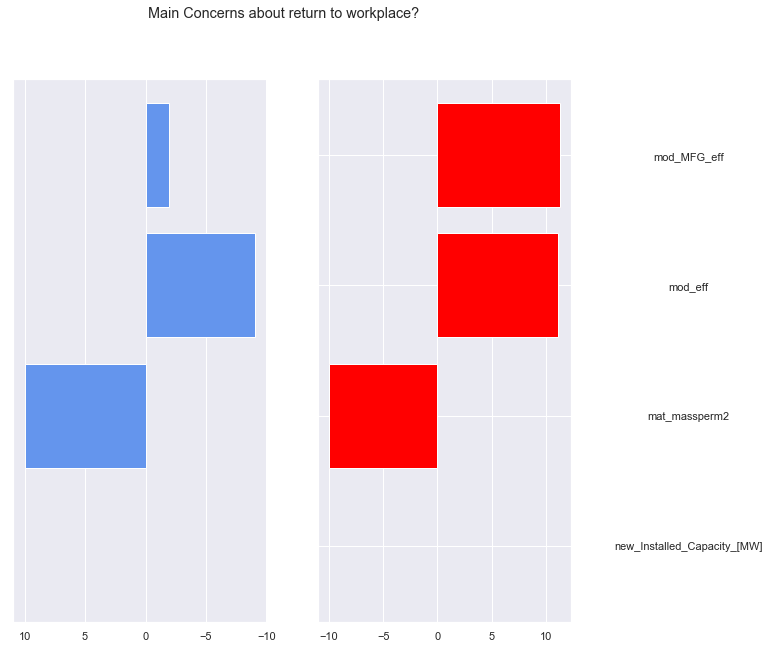

In [109]:
pos = np.arange(len(fooPosDemand)) + 0

fig, (ax_left, ax_right) = plt.subplots(ncols=2)
ax_left.barh(pos, fooPosDemand['Virgin Needs Change'], align='center', facecolor='cornflowerblue')
ax_left.set_yticks([])
ax_left.invert_xaxis()
ax_right.barh(pos, fooNegDemand['Virgin Needs Change'], align='center', facecolor='red')
ax_right.set_yticks(pos)
ax_right.set_yticklabels(fooPosDemand.index, ha='center', x=+1.5)
plt.suptitle('Main Concerns about return to workplace?')
plt.show()

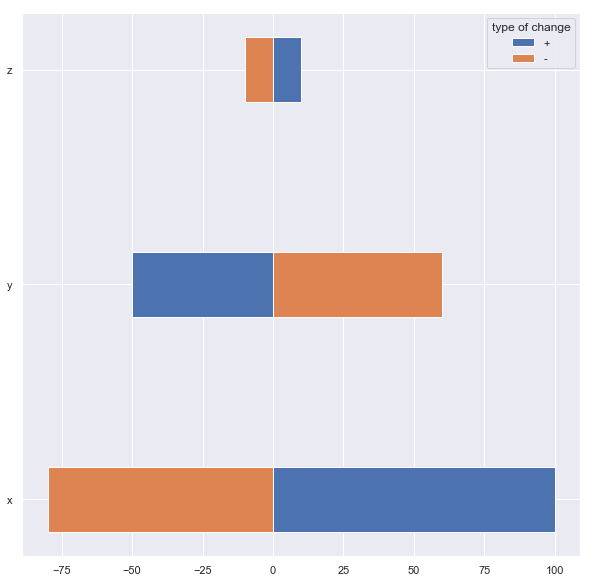

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

# creating a dataframe
df = pd.DataFrame()
df['input'] = ['x','y','z']
df['+']=[100,-50,10]
df['-']=[-80,60,-10]

#now stacking it
df2 = pd.melt(df, id_vars ='input', var_name='type of change', value_name='change in the output' )

fig, ax = plt.subplots()
for typ, df in zip(df2['type of change'].unique(),df2.groupby('type of change')):
    ax.barh(df[1]['input'], df[1]['change in the output'], height=0.3, label=typ)
ax.legend(title = 'type of change')  

In [ ]:
# Attempting at plotting

In [ ]:
Concerns = df_Q3['Concerns']
num_concerns = len(Concerns)
Female = df_Q3['Female']
Male = df_Q3['Male']
pos = np.arange(num_concerns) + .5

fig, (ax_left, ax_right) = plt.subplots(ncols=2)
ax_left.barh(pos, Male, align='center', facecolor='cornflowerblue')
ax_left.set_yticks([])
ax_left.invert_xaxis()
ax_right.barh(pos, Female, align='center', facecolor='red')
ax_right.set_yticks(pos)
ax_right.set_yticklabels(Concerns, ha='center', x=+1.5)
plt.suptitle('Main Concerns about return to workplace?')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure(1)
fig.clf()

ax = fig.add_subplot(1, 1, 1)
ay.annotate('', xy=(0, -0.1), xycoords='axes fraction', xytext=(1, -0.1),
arrowprops=dict(arrowstyle="-", color='b'))
plt.show()

# ARROW PROP
ax.set_facecolor((1.0, 0.47, 0.42))


In [ ]:
import matplotlib
matplotlib.use('Agg')
import pylab
from  matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Times-Roman']})
rc('text', usetex = True)
matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]

figure, axs = matplotlib.pyplot.subplots(5, sharex = True, squeeze = True)
x_ticks = axs[4].xaxis.get_major_ticks()
x_ticks[0].label1.set_visible(False) ## set first x tick label invisible
x_ticks[-1].label1.set_visible(False) ## set last x tick label invisible
pylab.tight_layout()
pylab.savefig('./test.png', dpi = 200)

# OTHER PLOT CODE TESTED

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
'''
df = df.rename_axis('year')
foo = pd.melt(df.reset_index(), id_vars=["year"])
foo

plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (14, 6)

sns.set_context(rc = {'patch.linewidth': 1})
sns.barplot(x = "year", y='value', hue='variable', data = foo, edgecolor='white')
''';

In [ ]:
from matplotlib.patches import Polygon, Patch


In [ ]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    colorlist = ['orange','orange','orange', 'orange', 
                 'green','green','green', 'green', 
                 'blue', 'blue', 'blue', 'blue',
                 'cyan', 'cyan', 'cyan', 'cyan']
    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    jj=0
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        zz = 0
        
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                if zz >= 2:
                    rect.set_hatch('/') #edited part   
                    rect.set_facecolor('red')
                zz += 1
                jj+=1
                rect 
                rect.set_color(colorlist[jj])
         #       rect.set_color('green')
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    print(n_df)
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

# create fake dataframes
df1 = df[['PV_ICE_base', 'PV_ICE_increase_high']]
df2 = df[['Irena_EL_base', 'Irena_EL_increase_high']]
df3 = df[['Irena_RL_base', 'Irena_EL_increase_high']]
df4 = df[['Irena 2016', 'inc0']]
df5 = df[['CSA 2000', 'inc0']]

# Then, just call :
plot_clustered_stacked([df1, df2, df3, df4, df5],["df1", "df2", "df3", "df4", "df5"])
    

In [ ]:
df.keys()

In [ ]:
ax=df['PV_ICE_high'].plot.bar(position=0, width=.1, color=['mediumspringgreen'], align='center', hatch='/')

df['PV_ICE_base'].plot.bar(position=0, width=.1, color=['mediumspringgreen'], align='center')
   
df['Irena_EL_high'].plot.bar(ax=ax, position=-1, width=.1, color=['green'], hatch='/')

df['Irena_EL_base'].plot.bar(ax=ax, position=-1, stacked=True, width=.1, color=['blue'])

df['Irena_RL_high'].plot.bar(ax=ax, position=-2, width=.1, color=['red'], hatch='/')
        
df['Irena_RL_base'].plot.bar(ax=ax, position=-2, width=.1, color=['cyan'])

df['Irena 2016'].plot.bar(ax=ax, position=-3, width=.1, color=['magenta'])
df['CSA 2000'].plot.bar(ax=ax, position=-4, width=.1, color=['yellow'])

ax.

In [ ]:
ax=df[['PV_ICE_base', 'PV_ICE_increase_high']].plot.bar(stacked=True, position=0,
                            width=.1, color=['yellowgreen', 'mediumspringgreen'], align='center')
   
df[['Irena_EL_base', 'Irena_EL_increase_high']].plot.bar(ax=ax, stacked=True, position=-1, width=.1, 
                                                              color=['green', 'blue'], hatch=('+','/'))
        
cx = df[['Irena_RL_base', 'Irena_RL_increase_high']].plot.bar(ax=ax,  stacked=True, position=-2, width=.1, color=['green', 'red'])
dx = df[['Irena 2016']].plot.bar(ax=ax, position=-3, width=.1, color=['magenta'])
ex = df[['CSA 2000']].plot.bar(ax=ax, position=-4, width=.1, color=['yellow'])

for container, hatch in zip(ax.containers, ("-", "*")):
    for patch in container.patches:
        patch.set_hatch(hatch)



In [ ]:
ax=df['PV_ICE_high'].plot.bar(position=2, width=.1, color=['mediumspringgreen'], align='center', hatch='/')

df['PV_ICE_base'].plot.bar(position=2, width=.1, color=['mediumspringgreen'], align='center')
   
df['Irena_EL_high'].plot.bar(ax=ax, position=1, width=.1, color=['green'], hatch='/')

df['Irena_EL_base'].plot.bar(ax=ax, position=1, stacked=True, width=.1, color=['blue'])

df['Irena_RL_high'].plot.bar(ax=ax, position=0, width=.1, color=['red'], hatch='/')
        
df['Irena_RL_base'].plot.bar(ax=ax, position=0, width=.1, color=['cyan'])

df['Irena 2016'].plot.bar(ax=ax, position=-1, width=.1, color=['magenta'])
df['CSA 2000'].plot.bar(ax=ax, position=-2, width=.1, color=['yellow'])

ax.axhline(10, linewidth=5, color='r')



In [ ]:
ax

In [ ]:
c = ["blue", "purple"]
for i, g in enumerate(dfall.groupby("variable")):
    ax = sns.barplot(data=g[1],
                     x="index",
                     y="vcs",
                     hue="Name",
                     color=c[i],
                     zorder=-i, # so first bars stay on top
                     edgecolor="k")
ax.legend_.remove() # remove the redundant legends 

In [ ]:
pd.melt(df.reset_index(), id_vars=["index"])

In [ ]:
import seaborn as sns

In [ ]:
for i, g in enumerate(df):
    print(i, g)

In [ ]:
for i, g in enumerate(df):
    ax = sns.barplot(data=df[g],
#                     x="index",
#                     y="value",
#                     hue="Name",
#                     color=c[i],
              #       zorder=-i, # so first bars stay on top
 #                    edgecolor="k"
                    )
ax.legend_.remove() # remove the redundant legends 

In [ ]:
df1["Name"] = "df1"
df2["Name"] = "df2"
df3["Name"] = "df3"
dfall = pd.concat([pd.melt(i.reset_index(),
                           id_vars=["Name", "index"]) # transform in tidy format each df
                   for i in [df1, df2, df3]],
                   ignore_index=True)

In [ ]:
print("Figure 11 Installed CApacity for all Scenarios")

years = [2030, 2050]
tableapp=[]
for name in names:
    colapp=[]
    for year in years:
         colapp.append(USyearly.filter(regex='Capacity_'+name).loc[year][0])
    tableapp.append(colapp)
    
df= pd.DataFrame(tableapp, columns = years, index=names)
df = df.T 
df

In [ ]:
print("TABLE 7 - METRIC TONNES IN FIELD IN 2030")

tableapp=[]
for name in names:
    colapp=[]
    for mat in materials:
         colapp.append(UScum.filter(regex='VirginStock_'+mat+'_'+name).loc[2030][0]-
                       UScum.filter(regex='WasteAll_'+mat+'_'+name).loc[2030][0])
    tableapp.append(colapp)
    
df= pd.DataFrame(tableapp, columns = materials, index=names)
df = df.T
df.loc['Module'] = df.sum(axis=0)
df

In [ ]:
keyw='WasteEOL_'


# Loop over CASES
name0 = 'PV_ICE_base_[Tonnes]'
name2 = 'PV_ICE_high_[Tonnes]'
name3 = 'Irena_EL_high_[Tonnes]'
name4 = 'Irena_RL_high_[Tonnes]'

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    matcum.append(UScum[keyw+materials[ii]+'_'+name0].loc[2020])
    matcum.append(UScum[keyw+materials[ii]+'_'+name2].loc[2020])
    matcum.append(UScum[keyw+materials[ii]+'_'+name3].loc[2020])
    matcum.append(UScum[keyw+materials[ii]+'_'+name4].loc[2020])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050) 
dfcumulations2050 = dfcumulations2050/1000000   # in Million Tonnes
dfcumulations2050['Module'] = dfcumulations2050.sum(axis=1)
dfcumulations2050['Module']

print("Cumulative Values on 2020")
dfcumulations2050

### Previous way of compiling results

In [ ]:
r'''
USyearly=pd.DataFrame()


# In[10]:


keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

# Loop over objects
for kk in range(0, len(objects)):
    obj = objects[kk]

    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)


# In[12]:


keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

# Loop over objects
for kk in range(0, len(objects)):
    obj = objects[kk]

    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_EOL_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste_EOL_') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_EOL_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)


# In[13]:


keyword='mat_Total_MFG_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

# Loop over objects
for kk in range(0, len(objects)):
    obj = objects[kk]

    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["Waste_MFG_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('Waste_MFG') and col.endswith(obj.name+'_'+case)) ]
        USyearly['Waste_MFG_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)


# In[14]:


keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

# Loop over objects
for kk in range(0, len(objects)):
    obj = objects[kk]

    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        for ii in range (0, len(materials)):    
            material = materials[ii]
            foo = obj.scenario[case].material[material].materialdata[keyword].copy()
            foo = foo.to_frame(name=material)
            USyearly["VirginStock_"+material+'_'+obj.name+'_'+case] = foo[material]

        filter_col = [col for col in USyearly if (col.startswith('VirginStock_') and col.endswith(obj.name+'_'+case)) ]
        USyearly['VirginStock_Module_'+obj.name+'_'+case] = USyearly[filter_col].sum(axis=1)


# ### Converting to grams to METRIC Tons. 
# 

# In[15]:


USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons


# In[16]:


UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()


# ### Adding Installed Capacity to US

# In[17]:


keyword='Installed_Capacity_[W]'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminium_frames']

# Loop over SF Scenarios
for kk in range(0, len(objects)):
    obj = objects[kk]
    
    # Loop over Scenarios
    for jj in range(0, len(scenarios)):
        case = scenarios[jj]
        
        foo = obj.scenario[case].data[keyword]
        foo = foo.to_frame(name=keyword)
        UScum["Capacity_"+obj.name+'_'+case] = foo[keyword]


# ## Mining Capacity

# In[19]:


USyearly.index = r1.scenario['base'].data['year']
UScum.index = r1.scenario['base'].data['year']


UScum.to_csv('USCum.csv')
''';